In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier 
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("C:/Users/Administrator.DAI-PC2/Desktop/ML/Day7/HR_comma_sep.csv")
dum_hr = pd.get_dummies(df, drop_first = True)
dum_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.10,0.77,6,247,4,0,1,0,False,False,False,False,False,False,True,False,False,True,False
3,0.92,0.85,5,259,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.89,1.00,5,224,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False


In [3]:
y = dum_hr["left"]
X = dum_hr.drop("left", axis = 1)

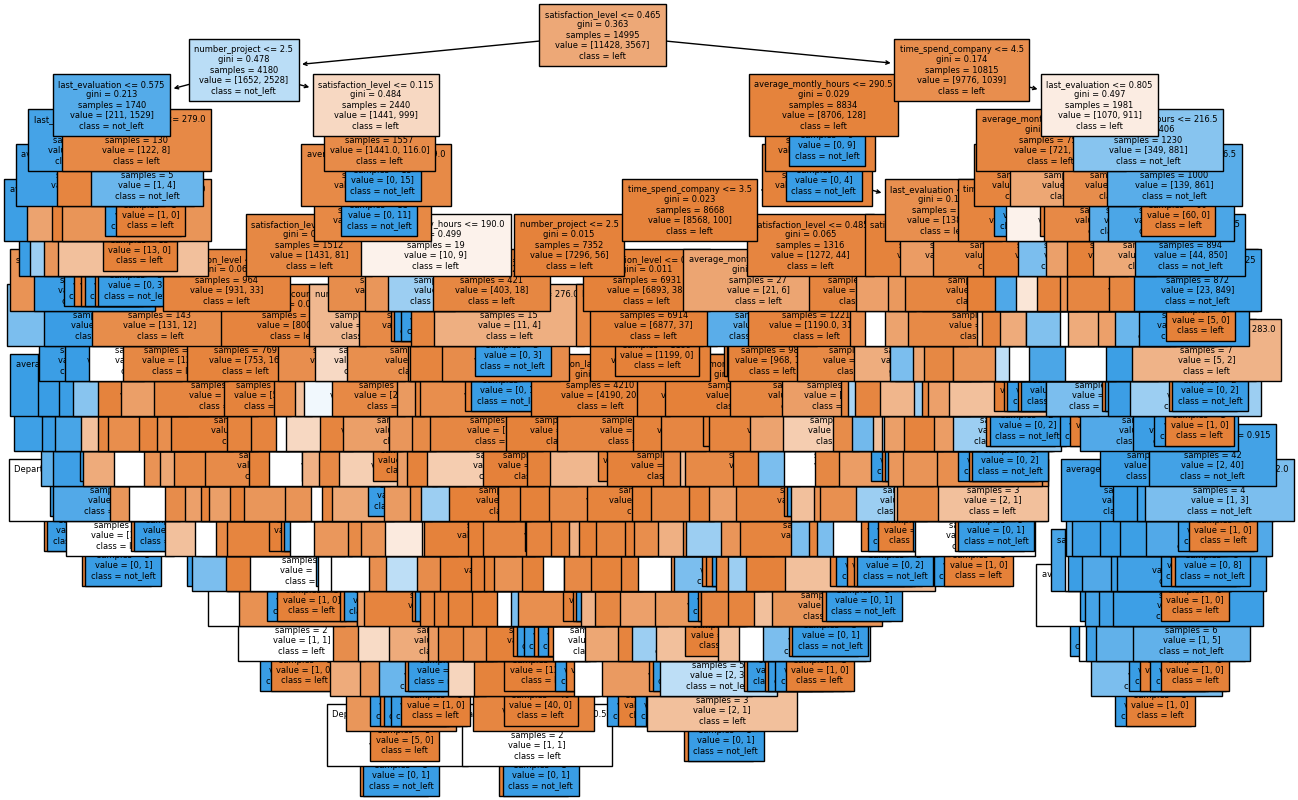

In [4]:
dtc = DecisionTreeClassifier()
dtc.fit(X, y)

#plotting tree
plt.figure(figsize=(15,10))
plot_tree(dtc,feature_names=list(X.columns),
               class_names=['left', 'not_left'],
               filled=True,fontsize=6);

In [5]:
#gridsearch to find best max_depth, min_samples_leaf, min_samples_split
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state=24)

params = {'min_samples_split' : np.arange(2, 35, 5), 'min_samples_leaf':np.arange(1, 35, 5), 'max_depth': [None, 4, 3, 2, 6, 8, 10]}
gcv = GridSearchCV(dtc, param_grid = params, cv = kfold, scoring = 'neg_log_loss')
gcv.fit(X, y)
print(gcv.best_score_)
print(gcv.best_params_)

-0.10424725773694762
{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 7}


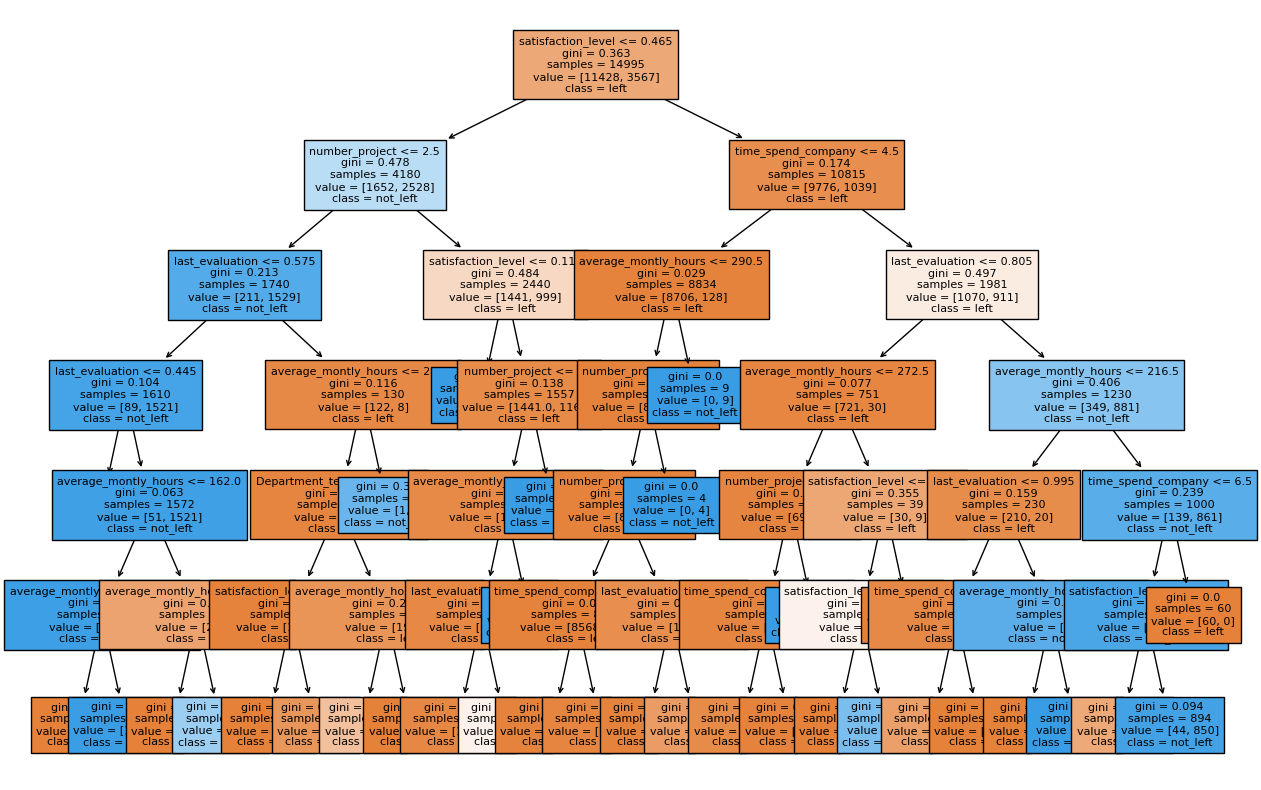

In [6]:
#plotting best tree 
best_tree = gcv.best_estimator_
plt.figure(figsize=(15,10))
plot_tree(best_tree,feature_names=list(X.columns),
               class_names=['left', 'not_left'],
               filled=True,fontsize= 8);

[5.31825066e-01 1.44507966e-01 1.00050816e-01 7.03848598e-02
 1.53111385e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.19907173e-04
 0.00000000e+00 0.00000000e+00]


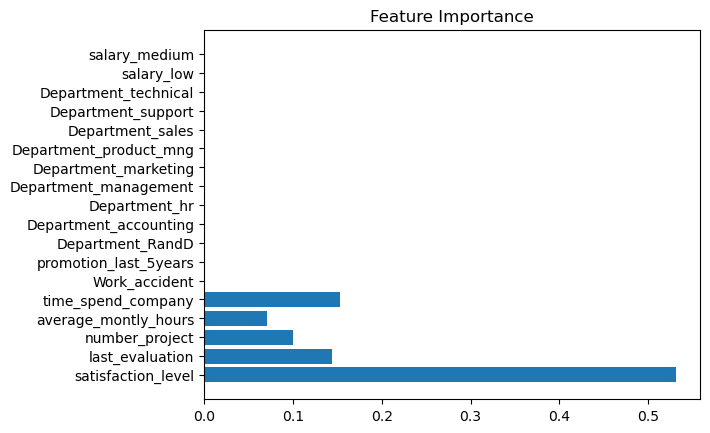

In [7]:
#feature importance
print(best_tree.feature_importances_)

df_imp = pd.DataFrame({'Feature':list(X.columns), 'Importance':best_tree.feature_importances_})

#plotting feature importance
plt.barh(df_imp['Feature'],
       df_imp['Importance'])
plt.title("Feature Importance")
#plt.xticks(rotation = 90)
plt.show()

In [8]:
df2 = pd.read_csv("C:/Users/Administrator.DAI-PC2/Desktop/ML/Day7/tst_hr.csv")
dum_hr_tst = pd.get_dummies(df2, drop_first = True)
dum_hr_tst.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_support,Department_technical,salary_low,salary_medium
0,0.11,0.88,7,272,4,0,0,False,False,False,True
1,0.72,0.87,5,223,5,0,0,False,False,True,False
2,0.37,0.52,2,159,3,0,0,False,False,True,False
3,0.41,0.50,2,153,3,0,0,False,False,True,False
4,0.67,0.61,3,202,2,0,0,False,True,False,True


In [9]:
dum_hr_tst.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department_support', 'Department_technical',
       'salary_low', 'salary_medium'],
      dtype='object')

In [10]:
dum_hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'salary_low', 'salary_medium'],
      dtype='object')